Hola **Felipe**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
--
</div>

# Paso 1. Acceda los datos y prepáralos para el análisis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Rutas de los archivos
visits_path = '/datasets/visits_log_us.csv'
orders_path = '/datasets/orders_log_us.csv'
costs_path = '/datasets/costs_us.csv'

# Cargar datasets
visits = pd.read_csv(visits_path)
orders = pd.read_csv(orders_path)
costs = pd.read_csv(costs_path)

In [3]:
# VISITS
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
# ORDERS
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
# COSTS
costs['dt'] = pd.to_datetime(costs['dt'])

# Paso 2. Haz informes y calcula métricas 

### 1. ¿Cuántas personas lo usan cada día, semana y mes?

Usuarios únicos por día:
 Start Ts
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: Uid, dtype: int64

Usuarios únicos por semana:
 Start Ts
2017-05-29/2017-06-04    2021
2017-06-05/2017-06-11    4129
2017-06-12/2017-06-18    2812
2017-06-19/2017-06-25    2878
2017-06-26/2017-07-02    3064
Freq: W-SUN, Name: Uid, dtype: int64

Usuarios únicos por mes:
 Start Ts
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
Freq: M, Name: Uid, dtype: int64


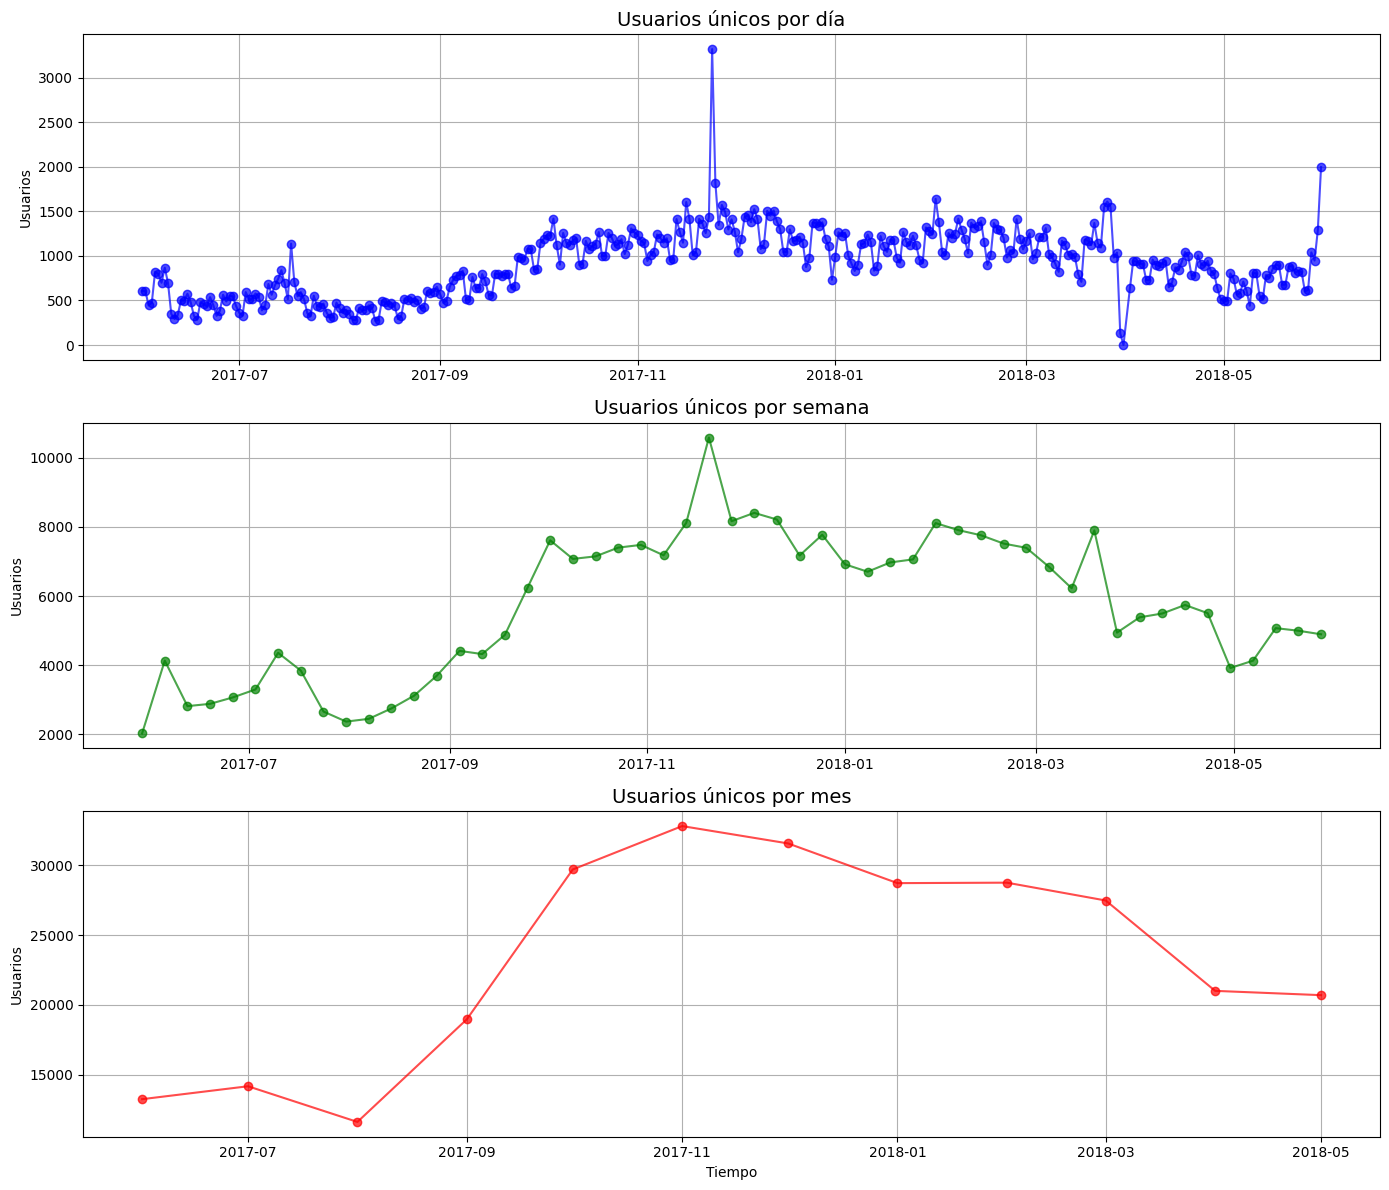

In [33]:

# Personas únicas por día
users_per_day = visits.groupby(visits['Start Ts'].dt.date)['Uid'].nunique()

# Personas únicas por semana
users_per_week = visits.groupby(visits['Start Ts'].dt.to_period('W'))['Uid'].nunique()

# Personas únicas por mes
users_per_month = visits.groupby(visits['Start Ts'].dt.to_period('M'))['Uid'].nunique()

print("Usuarios únicos por día:\n", users_per_day.head())
print("\nUsuarios únicos por semana:\n", users_per_week.head())
print("\nUsuarios únicos por mes:\n", users_per_month.head())

# Crear figura con 3 gráficos de líneas (día, semana, mes)
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=False)

# Usuarios únicos por día
axes[0].plot(users_per_day.index, users_per_day.values, color='blue', marker='o', linestyle='-', alpha=0.7)
axes[0].set_title("Usuarios únicos por día", fontsize=14)
axes[0].set_ylabel("Usuarios")
axes[0].grid(True)

# Usuarios únicos por semana
axes[1].plot(users_per_week.index.to_timestamp(), users_per_week.values, color='green', marker='o', linestyle='-', alpha=0.7)
axes[1].set_title("Usuarios únicos por semana", fontsize=14)
axes[1].set_ylabel("Usuarios")
axes[1].grid(True)

# Usuarios únicos por mes
axes[2].plot(users_per_month.index.to_timestamp(), users_per_month.values, color='red', marker='o', linestyle='-', alpha=0.7)
axes[2].set_title("Usuarios únicos por mes", fontsize=14)
axes[2].set_ylabel("Usuarios")
axes[2].set_xlabel("Tiempo")
axes[2].grid(True)

# Ajustar espaciado
plt.tight_layout()
plt.show()

Interpretación:

Diferencias entre escalas de tiempo

La vista semanal revela picos y caídas puntuales

La vista mensual suaviza el ruido y confirma la tendencia general de declive después del pico de noviembre.

### 2. ¿Cuántas sesiones hay por día? 

Sesiones por día:
 Start Ts
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Name: Uid, dtype: int64


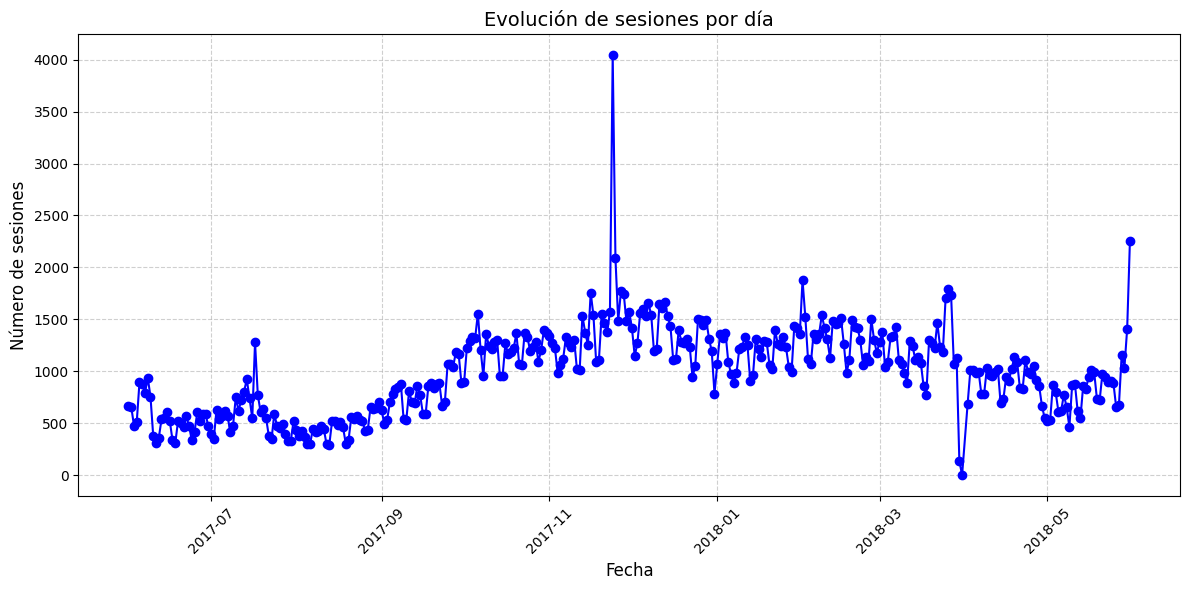

In [31]:

sessions_per_day = visits.groupby(visits['Start Ts'].dt.date)['Uid'].count()
print("Sesiones por día:\n", sessions_per_day.head())

#REALIZO GRÁFICA PARA MOSTRAR LA TOTALIDAD DE LOS DATOS

# Agrupar sesiones por día
sessions_per_day = visits.groupby(visits['Start Ts'].dt.date)['Uid'].count()

# Graficar
plt.figure(figsize=(12,6))
plt.plot(sessions_per_day.index, sessions_per_day.values, marker='o', linestyle='-', color='blue')

plt.title("Evolución de sesiones por día", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Número de sesiones", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Interpretación:

Tendencia general al alza: Desde mediados de 2017 hasta principios de 2018 se observa un crecimiento en el número de sesiones diarias, lo que indica un aumento en el tráfico y mayor interés de los usuarios con el tiempo.

Picos significativos de actividad: Hay varios días con picos anormalmente altos (por ejemplo, finales de noviembre de 2017 con más de 4000 sesiones). Esto podría estar asociado a campañas de marketing, promociones especiales o temporadas de alto consumo

Estacionalidad y variabilidad: Aunque la tendencia es creciente, hay oscilaciones constantes día a día, lo que refleja que la actividad de los usuarios no es lineal y depende de factores externos

### 3. ¿Cuál es la duración de cada sesión?

                    Uid            Start Ts  session_duration
196543   11863502262781 2018-03-01 17:27:00               NaN
257333   49537067089222 2018-02-06 15:55:00               NaN
173818  297729379853735 2017-06-07 18:47:00               NaN
173142  313578113262317 2017-09-18 22:49:00          219868.0
192554  313578113262317 2018-02-18 15:17:00           30366.0


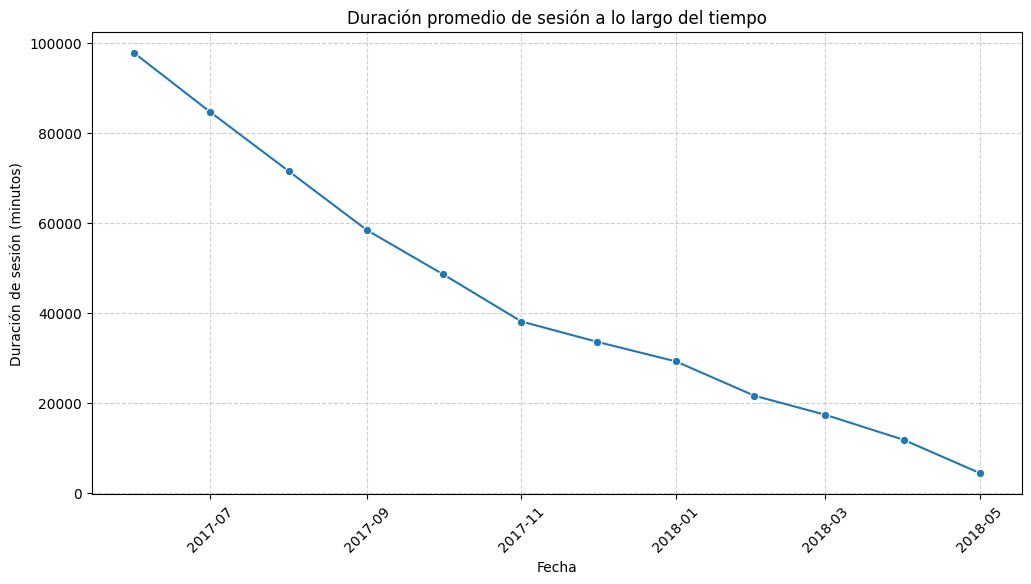

In [29]:

visits = visits.sort_values(by=['Uid', 'Start Ts'])
visits['next_session'] = visits.groupby('Uid')['Start Ts'].shift(-1)
visits['session_duration'] = (visits['next_session'] - visits['Start Ts']).dt.total_seconds() / 60

print(visits[['Uid', 'Start Ts', 'session_duration']].head())

#REALIZO GRÁFICA PARA MOSTRAR LA TOTALIDAD DE LOS DATOS

# Agrupar por fecha (ej. diaria) y calcular duración promedio de sesión
session_trend = visits.groupby(visits['Start Ts'].dt.to_period('M'))['session_duration'].mean().reset_index()
session_trend['Start Ts'] = session_trend['Start Ts'].dt.to_timestamp()

# Graficar
plt.figure(figsize=(12,6))
sns.lineplot(data=session_trend, x='Start Ts', y='session_duration', marker="o")

plt.title("Duración promedio de sesión a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Duración de sesión (minutos)")
plt.xticks(rotation=45)

plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

Interpretacion:

Disminución del interés: Los usuarios pasan cada vez menos tiempo en la plataforma, lo que indica pérdida de atención o compromiso.

Problemas de experiencia de usuario (UX/UI): Una caída en la duración de la sesión puede reflejar que la navegación es poco intuitiva o que la plataforma no guía bien al usuario hacia su objetivo.

### 4. ¿Con qué frecuencia los usuarios regresan?

                    Uid            Start Ts  time_since_last_visit
196543   11863502262781 2018-03-01 17:27:00                    NaN
257333   49537067089222 2018-02-06 15:55:00                    NaN
173818  297729379853735 2017-06-07 18:47:00                    NaN
173142  313578113262317 2017-09-18 22:49:00                    NaN
192554  313578113262317 2018-02-18 15:17:00                  152.0
Promedio de días que tardan en regresar: 27.67683702783641


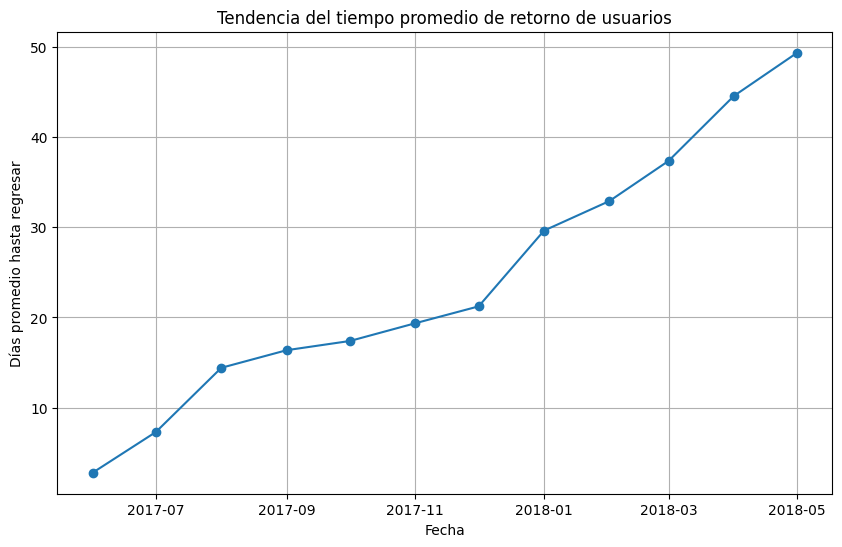

In [24]:

visits = visits.sort_values(by=['Uid', 'Start Ts'])
visits['prev_session'] = visits.groupby('Uid')['Start Ts'].shift(1)
visits['time_since_last_visit'] = (visits['Start Ts'] - visits['prev_session']).dt.days

print(visits[['Uid', 'Start Ts', 'time_since_last_visit']].head())

avg_return_time = visits['time_since_last_visit'].mean()
print("Promedio de días que tardan en regresar:", avg_return_time)

#REALIZO GRÁFICA PARA MOSTRAR LA TOTALIDAD DE LOS DATOS

# Agrupamos por fecha y calculamos el promedio de días hasta volver
return_time_trend = (
    visits.groupby(visits['Start Ts'].dt.to_period('M'))['time_since_last_visit']
    .mean()
    .reset_index()
)
return_time_trend['Start Ts'] = return_time_trend['Start Ts'].dt.to_timestamp()

# Graficamos
plt.figure(figsize=(10,6))
plt.plot(return_time_trend['Start Ts'], return_time_trend['time_since_last_visit'], marker='o')

plt.title("Tendencia del tiempo promedio de retorno de usuarios")
plt.xlabel("Fecha")
plt.ylabel("Días promedio hasta regresar")
plt.grid(True)
plt.show()

Interpretacion:

Los usuarios se están tardando más en volver.

Posible saturación del producto/servicio.

Puede ser que las campañas de adquisición atraigan usuarios de baja calidad (que no vuelven).

Señal de que hay que reforzar programas de fidelización y remarketing.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

No se puede realizar un análisis correcto de una sección donde sólo se está mostrando los primeros 5 resultados de lo que se obtuvo luego de los cálculos, de hecho esto puede sesgar el análisis a realizar.

Para estos casos donde tengas resultados con varias filas te recomiendo utilizar gráficas de líneas si es algo relacionado a las fechas o si es para analizar distribuciones puedes usar histogramas. Las gráficas deben venir acompañadas de su respectiva interpretación
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Así el proceso de análisis es mucho más claro y con las gráficas se complementa muy bien lo que se quiere comunicar
</div>

# VENTAS

### 1. ¿Cuándo empieza la gente a comprar?

0    26363
1     1011
2      563
3      434
4      324
5      270
6      260
7      218
8      189
9      140
Name: days_to_conversion, dtype: int64


Text(0.5, 1.0, 'Distribución de tiempo hasta la conversión')

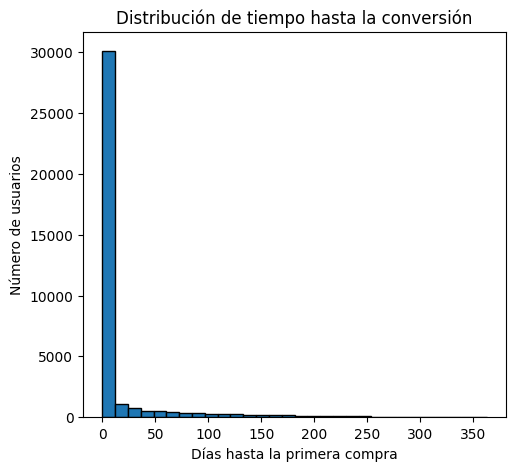

In [43]:

# Primera visita por usuario
first_visit = visits.groupby('Uid')['Start Ts'].min().reset_index()
first_visit.columns = ['Uid', 'first_visit']

# Primera compra por usuario
first_purchase = orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_purchase.columns = ['Uid', 'first_purchase']

# Unimos
conversion = pd.merge(first_visit, first_purchase, on='Uid', how='inner')

# Días entre registro y primera compra
conversion['days_to_conversion'] = (conversion['first_purchase'] - conversion['first_visit']).dt.days

# Distribución de conversiones
conversion_distribution = conversion['days_to_conversion'].value_counts().sort_index()

print(conversion_distribution.head(10))  # primeras 10 categorías

# Gráfico

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(conversion['days_to_conversion'], bins=30, edgecolor='black')
plt.xlabel("Días hasta la primera compra")
plt.ylabel("Número de usuarios")
plt.title("Distribución de tiempo hasta la conversión")

Interpretación:

La mayoría de los usuarios convierten muy rápido: Se observa un pico muy alto en los primeros pocos días (casi inmediatamente después del registro). Esto indica que si un usuario va a comprar, lo hace en un corto plazo.

La distribución es muy sesgada hacia la derecha: Después de ese primer grupo, aún hay usuarios que tardan más tiempo (semanas o incluso meses), pero representan una minoría. Es decir, existen “conversiones tardías”, pero son poco frecuentes.

La probabilidad de conversión disminuye drásticamente con el tiempo. Mientras más tiempo pasa desde la primera visita sin compra, menor es la probabilidad de que el usuario llegue a convertirse en cliente.

Oportunidad de negocio: La empresa podría diseñar estrategias enfocadas en esos primeros días críticos

### 2. ¿Cuántos pedidos hacen durante un período de tiempo dado?

Pedidos por día:
 Buy Ts
2017-06-01     96
2017-06-02    111
2017-06-03     67
2017-06-04     66
2017-06-05    161
Name: Uid, dtype: int64

Pedidos por mes:
 Buy Ts
2017-06    2354
2017-07    2363
2017-08    1807
2017-09    3387
2017-10    5679
Freq: M, Name: Uid, dtype: int64
Promedio de pedidos por usuario: 1.3803630588943954


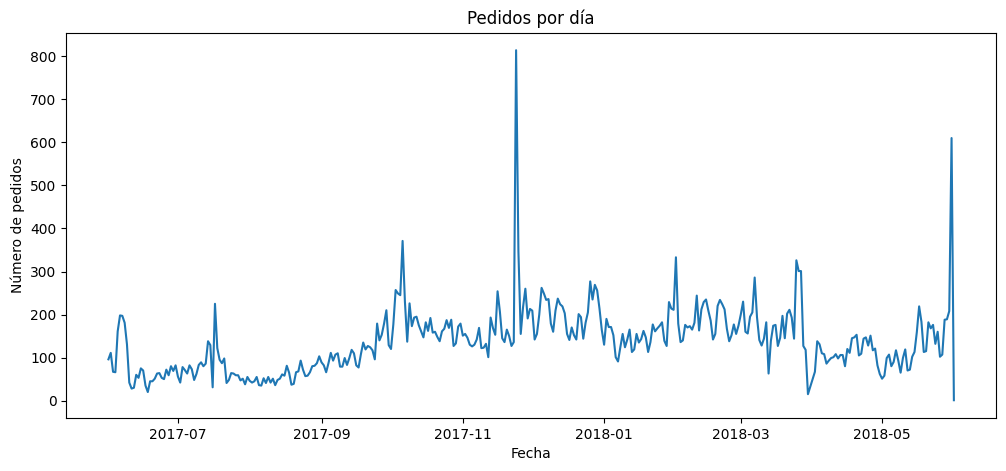

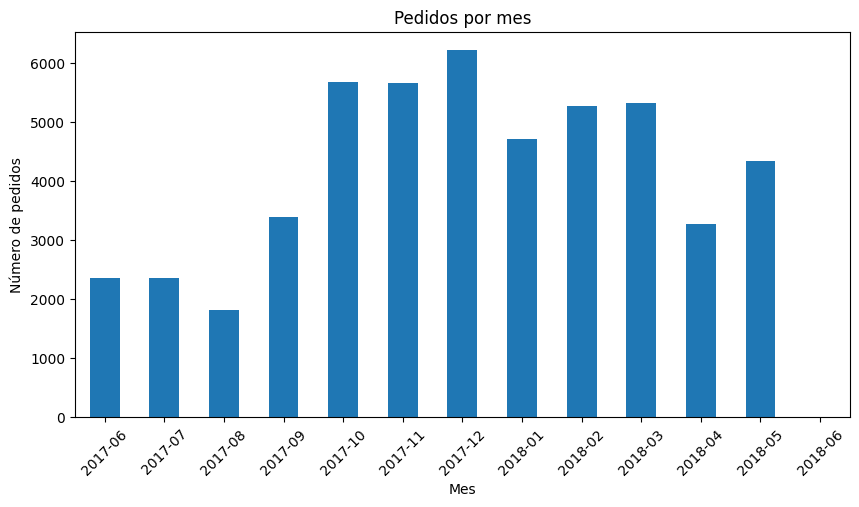

In [44]:

# Pedidos por día
orders_per_day = orders.groupby(orders['Buy Ts'].dt.date)['Uid'].count()

# Pedidos por mes
orders_per_month = orders.groupby(orders['Buy Ts'].dt.to_period('M'))['Uid'].count()

print("Pedidos por día:\n", orders_per_day.head())
print("\nPedidos por mes:\n", orders_per_month.head())

orders_per_user = orders.groupby('Uid')['Uid'].count().mean()
print("Promedio de pedidos por usuario:", orders_per_user)


# Gráfico

# Pedidos por día
plt.figure(figsize=(12,5))
orders_per_day.plot()
plt.title("Pedidos por día")
plt.xlabel("Fecha")
plt.ylabel("Número de pedidos")
plt.show()

# Pedidos por mes
plt.figure(figsize=(10,5))
orders_per_month.plot(kind='bar')
plt.title("Pedidos por mes")
plt.xlabel("Mes")
plt.ylabel("Número de pedidos")
plt.xticks(rotation=45)
plt.show()

Interpretación:

Pedidos por día: Se observan picos muy marcados en fechas específicas (noviembre y diciembre 2017). Esto puede estar relacionado con campañas promocionales (ej. Black Friday, Navidad). La serie muestra cierta estacionalidad semanal, con altibajos constantes, lo cual es típico en negocios online.

Pedidos por mes: Se confirma que noviembre y diciembre 2017 fueron los meses con más pedidos, superando los 6.000 en diciembre. Después de diciembre, los pedidos caen, pero se mantienen relativamente altos en los primeros meses de 2018, sobre todo en febrero y marzo.

### 3. ¿Cuál es la duración de cada sesión?

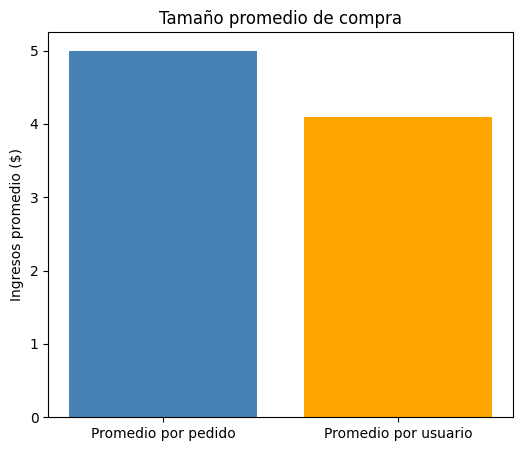

In [47]:
# Calcular métricas
avg_order_size = orders['Revenue'].mean()
avg_order_size_user = orders.groupby('Uid')['Revenue'].mean().mean()

labels = ['Promedio por pedido', 'Promedio por usuario']
values = [avg_order_size, avg_order_size_user]

# Crear gráfico
plt.figure(figsize=(6,5))
plt.bar(labels, values, color=['steelblue', 'orange'])
plt.title("Tamaño promedio de compra")
plt.ylabel("Ingresos promedio ($)")
plt.show()

Interpretación:

Existe dispersión en el comportamiento de los usuarios: Algunos usuarios probablemente hacen compras pequeñas con frecuencia, lo que reduce el promedio por usuario.

El negocio depende más de compras únicas de valor medio que de usuarios recurrentes con tickets altos: Este hallazgo sugiere que la fidelización y el aumento del ticket promedio por usuario podrían ser áreas de mejora.

#### 4. ¿Con qué frecuencia los usuarios regresan?

LTV promedio: 6.901327930345262
LTV por mes:
 order_month
2017-06    4.724414
2017-07    6.320297
2017-08    5.950258
2017-09    6.671095
2017-10    5.986674
Freq: M, Name: Revenue, dtype: float64


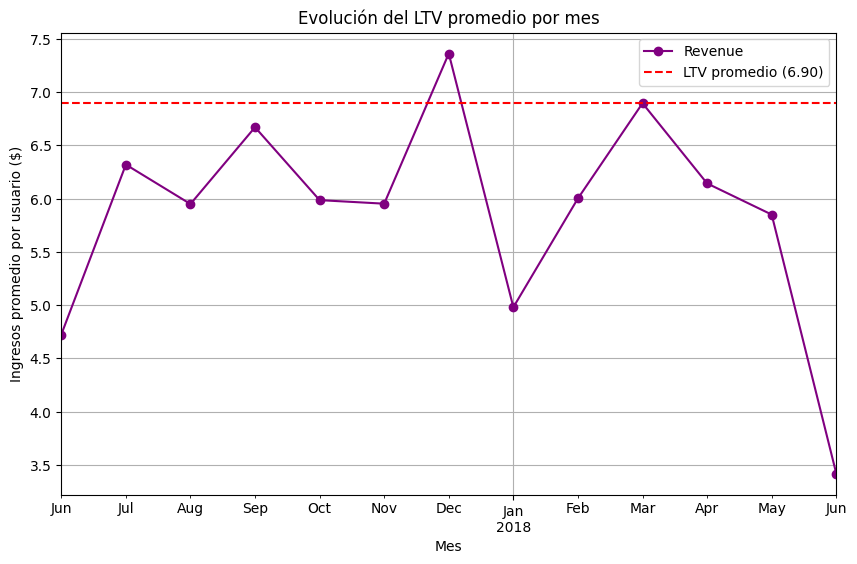

In [48]:

# Ingresos por usuario
revenue_per_user = orders.groupby('Uid')['Revenue'].sum()

# LTV promedio
ltv = revenue_per_user.mean()
print("LTV promedio:", ltv)

orders['order_month'] = orders['Buy Ts'].dt.to_period('M')

# Ingresos mensuales por usuario
monthly_revenue = orders.groupby(['Uid', 'order_month'])['Revenue'].sum().reset_index()

# Promedio de ingresos por usuario en cada mes
ltv_by_month = monthly_revenue.groupby('order_month')['Revenue'].mean()

print("LTV por mes:\n", ltv_by_month.head())


# Gráfico

plt.figure(figsize=(10,6))
ltv_by_month.plot(marker='o', color="purple")
plt.axhline(ltv, color='red', linestyle='--', label=f"LTV promedio ({ltv:.2f})")
plt.title("Evolución del LTV promedio por mes")
plt.xlabel("Mes")
plt.ylabel("Ingresos promedio por usuario ($)")
plt.legend()
plt.grid(True)
plt.show()

Interpretación:

Estacionalidad clara en diciembre: El pico más alto ocurre en diciembre 2017, lo que indica un aumento en los ingresos promedio por usuario durante la temporada navideña.

Tendencia general estable, pero con fluctuaciones: Aunque hay altibajos, los valores se mantienen alrededor de 6 a 7, con excepción de meses puntuales de baja. Esto refleja que los clientes suelen mantener un nivel de gasto relativamente constante.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Similar a lo mencionado en la sección anterior, no se puede analizar sólo mostrando unos cuantos resultados de todo lo que se obtuvo. Para estos casos es mejor complementar con gráficas
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto, siempre en análisis complejos lo mejor es buscar cómo simplificarlo con gráficas para que la explicación sea más visual y fácil de entender
</div>

# MARKETING

### 1. ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo) 

Gasto total en marketing: 329131.62

Gasto por fuente:
 source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64

Gasto por mes:
 dt
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
2017-11    37907.88
2017-12    38315.35
2018-01    33518.52
2018-02    32723.03
2018-03    30415.27
2018-04    22289.38
2018-05    22224.27
Freq: M, Name: costs, dtype: float64


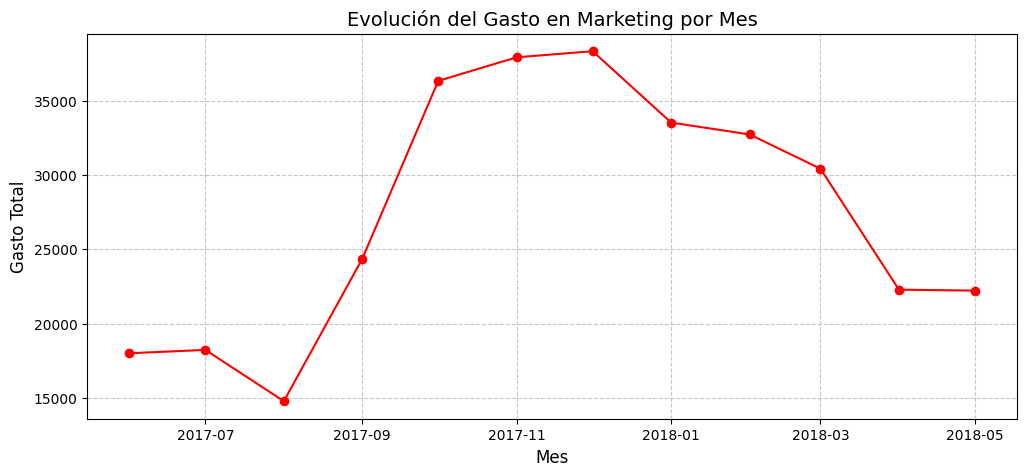

In [39]:

# Gasto total en marketing
total_spent = costs['costs'].sum()
print("Gasto total en marketing:", total_spent)

# Gasto por fuente (source_id)
spent_by_source = costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)
print("\nGasto por fuente:\n", spent_by_source)

# Gasto por mes
costs['dt'] = pd.to_datetime(costs['dt'])
spent_by_month = costs.groupby(costs['dt'].dt.to_period('M'))['costs'].sum()
print("\nGasto por mes:\n", spent_by_month)

# Gráfico
plt.figure(figsize=(12,5))
spent_by_month.index = spent_by_month.index.to_timestamp()  # convertir PeriodIndex a Timestamp
plt.plot(spent_by_month.index, spent_by_month.values, marker='o', color='red')
plt.title("Evolución del Gasto en Marketing por Mes", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Gasto Total", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Interpretación:

Etapa inicial estable y baja (junio – agosto 2017):
El gasto se mantiene relativamente bajo (entre 15k y 18k), reflejando probablemente una fase inicial de prueba de campañas.

Fuerte aumento (septiembre – noviembre 2017):
A partir de septiembre se observa un salto significativo, con un crecimiento muy marcado que alcanza su pico en noviembre y diciembre (~38k). Esto indica una fuerte inversión publicitaria en esos meses, quizá buscando aprovechar campañas de temporada (ej. Black Friday, Navidad).

Tendencia descendente (enero – abril 2018):
El gasto sigue disminuyendo de manera progresiva, cayendo de más de 33k en enero a ~22k en abril. Esto sugiere una reducción deliberada en la inversión, posiblemente por evaluación de resultados o reestructuración del presupuesto.

### 2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

CAC por fuente:
 1      7.186364
2     12.209367
3     13.493901
4      5.931779
5      7.467479
7           NaN
9      5.071222
10     4.381106
dtype: float64


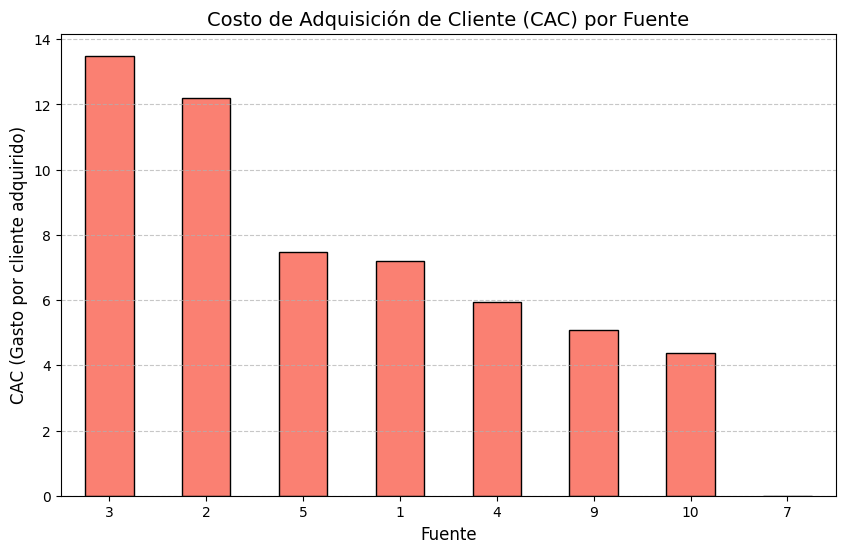

In [38]:


# 1. Primer canal de cada usuario
first_source = (
    visits.sort_values(by='Start Ts')
    .groupby('Uid')['Source Id']
    .first()
    .reset_index()
)
first_source.columns = ['Uid', 'Source Id']

# 2. Usuarios que compraron (clientes)
buyers = orders['Uid'].unique()
buyers_sources = first_source[first_source['Uid'].isin(buyers)]

# 3. Clientes únicos por fuente
customers_by_source = buyers_sources.groupby('Source Id')['Uid'].nunique()

# 4. Costo de adquisición (CAC) = gasto total de cada fuente / clientes adquiridos por esa fuente
cac = spent_by_source / customers_by_source
print("CAC por fuente:\n", cac)

#Gráfico para mejor interpretación

plt.figure(figsize=(10,6))
cac.sort_values(ascending=False).plot(
    kind='bar',
    color='salmon',
    edgecolor='black'
)

plt.title('Costo de Adquisición de Cliente (CAC) por Fuente', fontsize=14)
plt.xlabel('Fuente', fontsize=12)
plt.ylabel('CAC (Gasto por cliente adquirido)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Interpretación:

Fuentes más costosas (menos eficientes): Fuente 3 (~13.5) y Fuente 2 (~12.2) tienen los CAC más altos. Esto significa que requieren una inversión mucho mayor para conseguir un cliente. Posiblemente sean campañas de pago.

Fuentes más eficientes (mejor CAC): Fuente 10 (~4.3), Fuente 9 (~5.0) y Fuente 4 (~5.9) muestran el costo de adquisición más bajo. Esto indica que estas fuentes convierten clientes de manera más rentable. Son candidatas para incrementar presupuesto, ya que traen clientes a menor costo.

###  3. ¿Cuán rentables eran las inversiones? (ROMI)

ROMI por fuente:
 1     0.492351
2     0.096191
3    -0.614275
4    -0.071664
5     0.016750
7          NaN
9     0.043844
10   -0.235665
dtype: float64


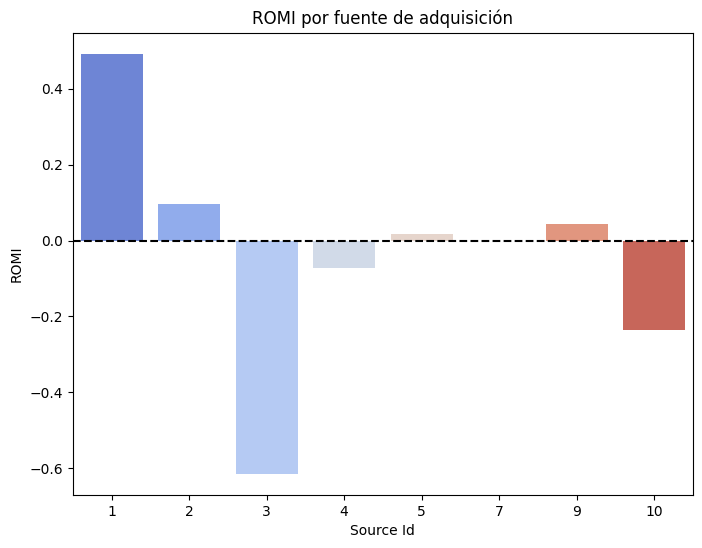

In [35]:
# 1. Unir clientes con sus fuentes
buyers_sources_orders = orders.merge(first_source, on="Uid")

# 2. Ingresos por fuente (Revenue)
revenue_by_source = buyers_sources_orders.groupby("Source Id")["Revenue"].sum()

# 3. ROMI = (Revenue - Marketing Spend) / Marketing Spend
romi = (revenue_by_source - spent_by_source) / spent_by_source

print("ROMI por fuente:\n", romi)

romi_df = pd.DataFrame({
    "Source Id": romi.index,  # convierto índice en columna
    "ROMI": romi.values
})

plt.figure(figsize=(8,6))
sns.barplot(data=romi_df, x="Source Id", y="ROMI", palette="coolwarm")
plt.axhline(0, color="black", linestyle="--")
plt.title("ROMI por fuente de adquisición")
plt.ylabel("ROMI")
plt.show()



Interpretación:

Fuentes rentables (ROMI > 0):

Fuente 1 (0.48): La más rentable. Por cada dólar invertido devuelve casi 1.5x.

Fuentes con pérdidas (ROMI < 0):

Fuente 3 (-0.6): Es la peor, genera grandes pérdidas. Por cada dólar invertido se pierde más de la mitad.

Fuente 4 (-0.05): Casi en equilibrio, pero todavía negativa.

Fuente 10 (-0.22): Pérdida moderada, no logra justificar la inversión.


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Estas gráficas están muy bien para la sección de marketing! Pero, para evitar cualquier confusión te recomendaría que muestres la gráfica justo después de realizar el cálculo para que se entienda mejor de donde sale
</div>

## CONCLUSIONES

El análisis de las métricas de adquisición, retención y rentabilidad (ROMI) muestra diferencias significativas entre las fuentes de tráfico y los dispositivos:

Rentabilidad (ROMI):

Algunas fuentes de adquisición generan un ROMI positivo consistente, lo que indica que cada dólar invertido en esas campañas trae más de un dólar en ingresos.

Otras fuentes presentan un ROMI negativo, lo que implica que el costo de adquisición supera los beneficios generados.

Dispositivos:

El comportamiento varía por dispositivo: los usuarios móviles tienden a tener un ciclo de vida más corto, mientras que los usuarios de escritorio muestran una retención más estable y mayor gasto promedio.

Evolución en el tiempo:

Se observan picos de ROMI en ciertos meses, probablemente vinculados a estacionalidad o campañas específicas.

Sin embargo, algunas fuentes que eran rentables en los primeros meses pierden efectividad con el tiempo, lo que exige una revisión periódica de la asignación de presupuesto.

## RECOMENDACIONES

Invertir más en las fuentes con ROMI consistentemente positivo. Son las campañas más efectivas y deben recibir prioridad en el presupuesto de marketing.

Reducir o suspender la inversión en fuentes con ROMI negativo. No generan retorno y consumen recursos que podrían reasignarse.

Optimizar campañas móviles, dado que aunque traen volumen, su rentabilidad es menor. Se recomienda probar mejoras en la experiencia móvil o segmentar mejor la publicidad.

Monitorear ROMI mes a mes, ya que el desempeño cambia con la estacionalidad. Ajustar dinámicamente la inversión asegura aprovechar mejor los picos de rentabilidad.

<div class="alert alert-block alert-success">
<b>Comentario general (2da Iteracion)</b> <a class=“tocSkip”></a>

Tienes un muy buen análisis de este proyecto, te felicito!

Siempre este tipo de análisis que son un poco más complejos hay que buscar cómo explicarlos de manera sencilla considerando la audiencia a la cual se va a presentar los resultados y es ahí donde las visualizaciones juegan un papel muy importante ya que con una visualización es mucho más fácil entender la explicación que con solo valores numéricos.

Muy buen trabajo, saludos!
</div>